# Word2Vec (Skipgram )

In [ ]:
student_id = "st123497"
student_name = "Sandhya Lamichhane"

In [351]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [352]:
np.__version__, torch.__version__

('1.23.4', '1.13.0+cpu')

In [353]:
import matplotlib
matplotlib.__version__

'3.3.4'

## 1. Load data

#### 1.1. Specify the sentences/corpus
Source: https://en.wikipedia.org/wiki/American_Revolutionary_War

In [354]:
f = open("corpus_text.txt", "r")
text = f.read()
f.close()

In [355]:
corpus = text.split(".")[:-1]
corpus[0:5]

['Widely considered as the war that secured the independence of the United States, fighting began on April 19, 1775, followed by the Lee Resolution on July 2, 1776, and the Declaration of Independence on July 4, 1776',
 ' The American Patriots were supported by the Kingdom of France and, to a lesser extent, the Kingdom of Spain and the Dutch Republic, in a conflict taking place in North America, the Caribbean, and the Atlantic Ocean',
 'Established by Royal charter in the 17th and 18th centuries, the American colonies were largely autonomous in domestic affairs and commercially prosperous, trading with Britain and its Caribbean colonies, as well as other European powers via their Caribbean entrepÃ´ts',
 " After British victory over the French in the Seven Years' War in 1763, tensions between the motherland and her 13 colonies arose over trade, policy in the Northwest Territory, and taxation measures, including the Stamp Act and Townshend Acts",
 " In an appeal to Britain's George III s

#### 1.2. Tokenize

In [356]:
corpus_tokenized = [sentence.strip().lower().split(" ") for sentence in corpus]
corpus_tokenized 

[['widely',
  'considered',
  'as',
  'the',
  'war',
  'that',
  'secured',
  'the',
  'independence',
  'of',
  'the',
  'united',
  'states,',
  'fighting',
  'began',
  'on',
  'april',
  '19,',
  '1775,',
  'followed',
  'by',
  'the',
  'lee',
  'resolution',
  'on',
  'july',
  '2,',
  '1776,',
  'and',
  'the',
  'declaration',
  'of',
  'independence',
  'on',
  'july',
  '4,',
  '1776'],
 ['the',
  'american',
  'patriots',
  'were',
  'supported',
  'by',
  'the',
  'kingdom',
  'of',
  'france',
  'and,',
  'to',
  'a',
  'lesser',
  'extent,',
  'the',
  'kingdom',
  'of',
  'spain',
  'and',
  'the',
  'dutch',
  'republic,',
  'in',
  'a',
  'conflict',
  'taking',
  'place',
  'in',
  'north',
  'america,',
  'the',
  'caribbean,',
  'and',
  'the',
  'atlantic',
  'ocean'],
 ['established',
  'by',
  'royal',
  'charter',
  'in',
  'the',
  '17th',
  'and',
  '18th',
  'centuries,',
  'the',
  'american',
  'colonies',
  'were',
  'largely',
  'autonomous',
  'in',
  '

#### 1.3 Numericalize
#### 1.3.1 Get all the unique words

In [357]:
flatten = lambda l: [item for sublist in l for item in sublist]
vocabs  = list(set(flatten(corpus_tokenized))) 

#### 1.3.2 Add `<UNK>`

In [358]:
word2index = dict()
word2index['<UNK>'] = 0 


In [359]:
word2index['<UNK>']

0

#### 1.3.3 Assign id to all these vocabulary

In [360]:
for index, vocab in enumerate(vocabs):
    word2index[vocab] = index+1
vocabs.append('<UNK>')

In [361]:
word2index

{'<UNK>': 0,
 'patriot-owned': 1,
 'allied': 2,
 'won,': 3,
 'minister': 4,
 'africa': 5,
 'engaged': 6,
 'patriot': 7,
 'cover': 8,
 'truncated': 9,
 'if': 10,
 'progress': 11,
 'setback': 12,
 'eliminating': 13,
 'evident:': 14,
 'moved': 15,
 'secretary': 16,
 'grasse': 17,
 'troops': 18,
 'revolutionary': 19,
 'had': 20,
 'sybil': 21,
 'again': 22,
 'favored': 23,
 'greene': 24,
 'new': 25,
 'british': 26,
 'while': 27,
 'cross': 28,
 'domestic': 29,
 'back': 30,
 'steuben': 31,
 'match': 32,
 'carlisle': 33,
 '8,000': 34,
 'widely': 35,
 'large': 36,
 'on': 37,
 'began': 38,
 'ended': 39,
 '14,': 40,
 'arms': 41,
 'detachment': 42,
 'ability': 43,
 'resupplied': 44,
 'most': 45,
 'latter': 46,
 'appalachians': 47,
 'defend': 48,
 'congress,': 49,
 'staten': 50,
 'entrepã´ts': 51,
 'opposed': 52,
 'others': 53,
 'york;': 54,
 'come': 55,
 'failed': 56,
 'carolinas': 57,
 'founded': 58,
 'cowpens': 59,
 'nations': 60,
 'stronger': 61,
 'forcing': 62,
 'artillery,': 63,
 'virtually':

In [362]:
#create index2word dictionary
#2 min    
index2word = {v:k for k, v in word2index.items()}

index2word

{0: '<UNK>',
 1: 'patriot-owned',
 2: 'allied',
 3: 'won,',
 4: 'minister',
 5: 'africa',
 6: 'engaged',
 7: 'patriot',
 8: 'cover',
 9: 'truncated',
 10: 'if',
 11: 'progress',
 12: 'setback',
 13: 'eliminating',
 14: 'evident:',
 15: 'moved',
 16: 'secretary',
 17: 'grasse',
 18: 'troops',
 19: 'revolutionary',
 20: 'had',
 21: 'sybil',
 22: 'again',
 23: 'favored',
 24: 'greene',
 25: 'new',
 26: 'british',
 27: 'while',
 28: 'cross',
 29: 'domestic',
 30: 'back',
 31: 'steuben',
 32: 'match',
 33: 'carlisle',
 34: '8,000',
 35: 'widely',
 36: 'large',
 37: 'on',
 38: 'began',
 39: 'ended',
 40: '14,',
 41: 'arms',
 42: 'detachment',
 43: 'ability',
 44: 'resupplied',
 45: 'most',
 46: 'latter',
 47: 'appalachians',
 48: 'defend',
 49: 'congress,',
 50: 'staten',
 51: 'entrepã´ts',
 52: 'opposed',
 53: 'others',
 54: 'york;',
 55: 'come',
 56: 'failed',
 57: 'carolinas',
 58: 'founded',
 59: 'cowpens',
 60: 'nations',
 61: 'stronger',
 62: 'forcing',
 63: 'artillery,',
 64: 'virtual

## 2. Prepare train data

In [363]:
def random_batch(batch_size,corpus, window_size=1):
    skipgrams = []
    for sentence in corpus:
        sentence_length = len(sentence)
        for i in range(1, sentence_length-1): 
             center_word = word2index[sentence[i]]
             outside_word = []
             for ws in range(window_size):
                    ### check if it is outside of range of the list
                    if i + 1 + ws < sentence_length:
                        outside_word.append(word2index[sentence[i+ws+1]])
                    if i - ws - 1 >= 0:
                        outside_word.append(word2index[sentence[(i - ws - 1)]])
             for o in outside_word:
                 skipgrams.append([center_word, o])
    # print(len(skipgrams))
    # print(skipgrams[0:10])                
    random_index = np.random.choice(range(len(skipgrams)), batch_size, replace=False)
             
    random_inputs, random_labels = [], []   
    for index in random_index:
        random_inputs.append([skipgrams[index][0]]) 
        random_labels.append([skipgrams[index][1]])
        
    return np.array(random_inputs), np.array(random_labels)
    

In [364]:
input, label = random_batch(10, corpus_tokenized,2)
print(f"{input.shape}")
print(f"{input=}")
print(f"{label=}")

(10, 1)
input=array([[964],
       [206],
       [617],
       [173],
       [844],
       [970],
       [272],
       [572],
       [900],
       [ 12]])
label=array([[1092],
       [ 484],
       [ 638],
       [ 316],
       [ 131],
       [ 376],
       [ 209],
       [   4],
       [   3],
       [ 445]])


## 3. Model

$$J(\theta) = -\frac{1}{T}\sum_{t=1}^{T}\sum_{\substack{-m \leq j \leq m \\ j \neq 0}}\log P(w_{t+j} | w_t; \theta)$$

where $P(w_{t+j} | w_t; \theta) = $

$$P(o|c)=\frac{\exp(\mathbf{u_o^{\top}v_c})}{\sum_{w=1}^V\exp(\mathbf{u_w^{\top}v_c})}$$

where $o$ is the outside words and $c$ is the center word

$$P(o|c)=\frac{\exp(\mathbf{u_o^{\top}v_c})}{\sum_{w=1}^V\exp(\mathbf{u_w^{\top}v_c})}$$

### 3.1 Creating the skipgram class

In [365]:
class Skipgram(nn.Module):
    ''''This class accepts the parameter vocabulary size and embedding size'''
    def __init__(self, voc_size, emb_size):
        super(Skipgram, self).__init__()
        self.embedding_center_word  = nn.Embedding(voc_size, emb_size)  
        self.embedding_outside_word = nn.Embedding(voc_size, emb_size)
    
    def forward(self, center_word, outside_word, all_vocabs):
        center_word_embed  = self.embedding_center_word(center_word)     
        outside_word_embed = self.embedding_outside_word(outside_word)  
        all_vocabs_embed   = self.embedding_outside_word(all_vocabs)    
        
        top_term = outside_word_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
        
        top_term_exp = torch.exp(top_term) 
        
        lower_term = all_vocabs_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)         
        lower_term_sum = torch.sum(torch.exp(lower_term), 1)
        
        loss_fn = -torch.mean(torch.log(top_term_exp / lower_term_sum))
        
        return loss_fn

### 3.2 Preparing all_vocabs


In [366]:

batch_size = 2

def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

all_vocabs = prepare_sequence(list(vocabs), word2index).expand(batch_size, len(vocabs))
all_vocabs.shape

torch.Size([2, 1107])

## 4. Training

In [367]:
batch_size = 2 
emb_size   = 2 
model      = Skipgram(len(vocabs), emb_size)

optimizer  = optim.Adam(model.parameters(), lr=0.001)

####  Window size = 2

In [368]:
import time

num_epochs = 10000
start = time.time()

for epoch in range(num_epochs):
    input_batch, label_batch = random_batch(batch_size, corpus_tokenized,2)
    input_batch = torch.LongTensor(input_batch)
    label_batch = torch.LongTensor(label_batch)
    
    loss = model(input_batch, label_batch, all_vocabs)
    
    #backpropagate
    loss.backward()
    
    #update alpha
    optimizer.step()
    
    #print epoch loss
    if (epoch + 1) % 1000 == 0:
        end = time.time()
        print(f"Epoch {epoch+1} | Loss: {loss:.6f} | Time {end - start} ")

Epoch 1000 | Loss: 7.318732 | Time 13.05141830444336 
Epoch 2000 | Loss: 9.206558 | Time 26.006444215774536 
Epoch 3000 | Loss: 11.164150 | Time 38.940213680267334 
Epoch 4000 | Loss: 9.382811 | Time 51.54894781112671 
Epoch 5000 | Loss: 8.154609 | Time 64.61796283721924 
Epoch 6000 | Loss: 8.884182 | Time 77.614741563797 
Epoch 7000 | Loss: 4.883473 | Time 90.71097588539124 
Epoch 8000 | Loss: 6.349676 | Time 103.987140417099 
Epoch 9000 | Loss: 10.135722 | Time 117.14238381385803 
Epoch 10000 | Loss: 11.375828 | Time 130.40574526786804 


## 5. Plot the embeddings

Check to see if related words are closer to each other or not

In [369]:
def get_embed(word):
    index = word2index.get(word,0)
    word = torch.LongTensor([index])

    center_embed  = model.embedding_center_word(word)
    outside_embed = model.embedding_outside_word(word)
    
    embed = (center_embed + outside_embed) / 2
    
    return  embed[0][0].item(), embed[0][1].item()


In [370]:
print(get_embed('widely'))
print(get_embed('fruits'))


(-0.09858286380767822, 0.670330286026001)
(-2.0753138065338135, 0.330477237701416)


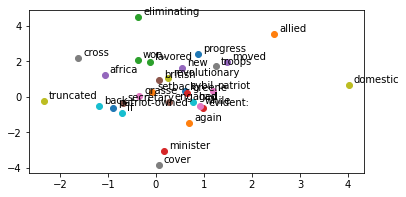

In [371]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:30]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

## 6. Cosine similarity


In [372]:
allied = get_embed('allied')
troops = get_embed('troops')
engaged = get_embed('engaged')

In [373]:
from scipy import spatial

def cosine_similarity(word1, word2):
    '''
        cosine_similarity function accepts the embeddings of two words and returns the 
        the degree of similarity between them using scipy.
    '''
    cos_sim = 1 - spatial.distance.cosine(word1, word2)  #distance = 1 - similarlity, because scipy only gives distance
    return cos_sim

In [374]:
skipgram_allied_troops = cosine_similarity(allied, troops)
skipgram_allied_engaged = cosine_similarity(allied, engaged)
skipgram_allied_allied = cosine_similarity(allied, allied)

print(f"allied vs troops {skipgram_allied_troops}")
print(f"allied vs engaged {skipgram_allied_engaged}")
print(f"allied vs allied {skipgram_allied_allied}" )

allied vs troops 0.999682213662394
allied vs engaged -0.1438590368655992
allied vs allied 1.0


# Counting Bag of Words

In [375]:
def cbow_random_batch(batch_size,corpus, window_size=1):
    continuous_bag = []
    for sentence in corpus:
        sentence_length = len(sentence)
        for i in range(1, sentence_length-1): 
             target = word2index[sentence[i]]
             outside_word = []
             for ws in range(window_size):
                    ### check if it is outside of range of the list
                    if i + 1 + ws < sentence_length:
                        outside_word.append(word2index[sentence[i+ws+1]])
                    if i - ws - 1 >= 0:
                        outside_word.append(word2index[sentence[(i - ws - 1)]])
             for o in outside_word:
                 continuous_bag.append([o, target])
    # print(len(skipgrams))
    # print(skipgrams[0:10])                
    random_index = np.random.choice(range(len(continuous_bag)), batch_size, replace=False)
             
    random_inputs, random_labels = [], []   
    for index in random_index:
        random_inputs.append([continuous_bag[index][0]]) 
        random_labels.append([continuous_bag[index][1]])
        
    return np.array(random_inputs), np.array(random_labels)
    

In [376]:
batch_size = 2
input_batch, target_batch = cbow_random_batch(batch_size,corpus_tokenized,2)
print(f"{input.shape}")
print(f"{input=}")
print(f"{label=}")

(10, 1)
input=array([[964],
       [206],
       [617],
       [173],
       [844],
       [970],
       [272],
       [572],
       [900],
       [ 12]])
label=array([[1092],
       [ 484],
       [ 638],
       [ 316],
       [ 131],
       [ 376],
       [ 209],
       [   4],
       [   3],
       [ 445]])


In [377]:
class CBOW(nn.Module):
    ''' Continuous Bag of words implementation 
        class that accepts the parameter vocabulary
        size and embedding size'''
    def __init__(self, voc_size, emb_size):
        super(CBOW, self).__init__()
        self.embedding_center_word  = nn.Embedding(voc_size, emb_size)  
        self.embedding_outside_word = nn.Embedding(voc_size, emb_size)
    
    def forward(self, center_word, outside_word, all_vocabs):
        center_word_embed  = self.embedding_center_word(center_word)     
        outside_word_embed = self.embedding_outside_word(outside_word)  
        all_vocabs_embed   = self.embedding_outside_word(all_vocabs)    
        
        top_term = outside_word_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)
        
        top_term_exp = torch.exp(top_term) 
        
        lower_term = all_vocabs_embed.bmm(center_word_embed.transpose(1, 2)).squeeze(2)         
        lower_term_sum = torch.sum(torch.exp(lower_term), 1)
        
        loss_fn = -torch.mean(torch.log(top_term_exp / lower_term_sum))
        
        return loss_fn

In [378]:
embedding_size = 2
model = CBOW(len(vocabs), embedding_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [379]:
import time

num_epochs = 10000
start = time.time()

for epoch in range(num_epochs):
    input_batch, label_batch = random_batch(batch_size, corpus_tokenized,2)
    input_batch = torch.LongTensor(input_batch)
    label_batch = torch.LongTensor(label_batch)
    
    loss = model(input_batch, label_batch, all_vocabs)
    
    #backpropagate
    loss.backward()
    
    #update alpha
    optimizer.step()
    
    #print epoch loss
    if (epoch + 1) % 1000 == 0:
        end = time.time()
        print(f"Epoch {epoch+1} | Loss: {loss:.6f} | Time {end - start} ")

Epoch 1000 | Loss: 6.971483 | Time 13.371768236160278 
Epoch 2000 | Loss: 4.372535 | Time 26.939287424087524 
Epoch 3000 | Loss: 7.279264 | Time 39.972848892211914 
Epoch 4000 | Loss: 6.640631 | Time 52.85222864151001 
Epoch 5000 | Loss: 8.528344 | Time 65.51423287391663 
Epoch 6000 | Loss: 6.814211 | Time 79.82058310508728 
Epoch 7000 | Loss: 4.344216 | Time 93.47020936012268 
Epoch 8000 | Loss: 7.458208 | Time 106.61209487915039 
Epoch 9000 | Loss: 19.586260 | Time 119.87194204330444 
Epoch 10000 | Loss: 5.346006 | Time 132.7896819114685 


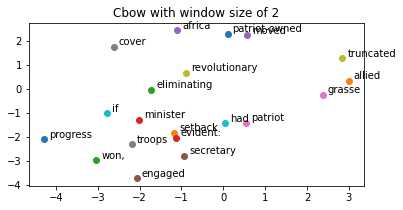

In [380]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.title('Cbow with window size of 2')
plt.show()


In [381]:
allied = get_embed('allied')
troops = get_embed('troops')
engaged = get_embed('engaged')

print(f"allied vs troops {cosine_similarity(allied, troops)}")
print(f"allied vs engaged {cosine_similarity(allied, engaged)}")
print(f"allied vs allied {cosine_similarity(allied, allied)}" )

allied vs troops -0.7597745955522088
allied vs engaged -0.5754375847884843
allied vs allied 1.0


# Word2Vec vs Negative Sampling

### Unigram distribution

$$P(w)=U(w)^{3/4}/Z$$

In [382]:
Z = 0.001

In [383]:
from collections import Counter

word_count = Counter(flatten(corpus_tokenized))
num_total_words = sum([c for w, c in word_count.items()])

In [384]:
word_count[',']

0

In [385]:
num_total_words

2585

In [386]:
unigram_table = []

for vo in vocabs:
    unigram_table.extend([vo] * int(((word_count[vo]/num_total_words)**0.75)/Z))

In [387]:
Counter(unigram_table)

Counter({'patriot-owned': 2,
         'allied': 2,
         'won,': 2,
         'minister': 4,
         'africa': 2,
         'engaged': 2,
         'patriot': 7,
         'cover': 2,
         'truncated': 2,
         'if': 2,
         'progress': 2,
         'setback': 2,
         'eliminating': 2,
         'evident:': 2,
         'moved': 6,
         'secretary': 2,
         'grasse': 2,
         'troops': 11,
         'revolutionary': 2,
         'had': 11,
         'sybil': 2,
         'again': 2,
         'favored': 2,
         'greene': 6,
         'new': 15,
         'british': 31,
         'while': 16,
         'cross': 2,
         'domestic': 4,
         'back': 2,
         'steuben': 2,
         'match': 2,
         'carlisle': 2,
         '8,000': 2,
         'widely': 2,
         'large': 2,
         'on': 39,
         'began': 2,
         'ended': 6,
         '14,': 2,
         'arms': 2,
         'detachment': 2,
         'ability': 2,
         'resupplied': 2,
         '

### Negative Sampling

In [388]:
import random

def negative_sampling(targets, unigram_table, k):
    batch_size = targets.size(0)
    neg_samples = []
    for i in range(batch_size):
        nsample = []
        target_index = targets[i].item()
        while len(nsample) < k: # num of sampling
            neg = random.choice(unigram_table)
            if word2index[neg] == target_index:
                continue
            nsample.append(neg)
        neg_samples.append(prepare_sequence(nsample, word2index).view(1, -1))
    
    return torch.cat(neg_samples)

### Testing the negative sampling

In [389]:
input_batch  = torch.Tensor(input_batch)
target_batch = torch.LongTensor(target_batch)

In [390]:
target_batch.shape

torch.Size([2, 1])

In [391]:
num_neg = 3
negative_sampling(target_batch, unigram_table, num_neg)

tensor([[856, 268, 915],
        [398, 250, 173]])

In [392]:
target_batch[1]

tensor([581])

### Model

$$\mathbf{J}_{\text{neg-sample}}(\mathbf{v}_c,o,\mathbf{U})=-\log(\sigma(\mathbf{u}_o^T\mathbf{v}_c))-\sum_{k=1}^K\log(\sigma(-\mathbf{u}_k^T\mathbf{v}_c))$$

In [393]:
class SkipgramNegSampling(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(SkipgramNegSampling, self).__init__()
        self.embedding_v = nn.Embedding(vocab_size, emb_size) # center embedding
        self.embedding_u = nn.Embedding(vocab_size, emb_size) # out embedding
        self.logsigmoid = nn.LogSigmoid()
                    
    def forward(self, center_words, target_words, negative_words):
        center_embeds = self.embedding_v(center_words) # [batch_size, 1, emb_size]
        target_embeds = self.embedding_u(target_words) # [batch_size, 1, emb_size]
        neg_embeds    = -self.embedding_u(negative_words) # [batch_size, num_neg, emb_size]
        
        positive_score = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]
        
        negative_score = neg_embeds.bmm(center_embeds.transpose(1, 2))
        #[batch_size, k, emb_size] @ [batch_size, emb_size, 1] = [batch_size, k, 1]
        
        loss = self.logsigmoid(positive_score) + torch.sum(self.logsigmoid(negative_score), 1)
                
        return -torch.mean(loss)
    
    def prediction(self, inputs):
        embeds = self.embedding_v(inputs)
        
        return embeds

### Training Negetive Sampling

In [394]:
batch_size     = 2 
embedding_size = 2 
model          = SkipgramNegSampling(len(vocabs),embedding_size)
num_neg        = 10 

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [395]:
import time

num_epochs = 10000
for epoch in range(num_epochs):
    
    start = time.time()
    
    input_batch, target_batch = random_batch(batch_size, corpus_tokenized,2)
    
    #input_batch: [batch_size, 1]
    input_batch = torch.LongTensor(input_batch)
    
    #target_batch: [batch_size, 1]
    target_batch = torch.LongTensor(target_batch)
    
    #negs_batch:   [batch_size, num_neg]
    negs_batch = negative_sampling(target_batch, unigram_table, num_neg)
    
    optimizer.zero_grad()
        
    loss = model(input_batch, target_batch, negs_batch)
    
    end = time.time()
        
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {end - start}")

Epoch: 1000 | cost: 6.777694 | time: 0.007509708404541016
Epoch: 2000 | cost: 10.912896 | time: 0.008523941040039062
Epoch: 3000 | cost: 8.639938 | time: 0.008287191390991211
Epoch: 4000 | cost: 13.128405 | time: 0.00599980354309082
Epoch: 5000 | cost: 7.257234 | time: 0.008000612258911133
Epoch: 6000 | cost: 9.408825 | time: 0.00699925422668457
Epoch: 7000 | cost: 7.211233 | time: 0.0060040950775146484
Epoch: 8000 | cost: 9.805929 | time: 0.0070040225982666016
Epoch: 9000 | cost: 9.504975 | time: 0.04700803756713867
Epoch: 10000 | cost: 9.892847 | time: 0.006964445114135742


In [396]:
#let's write a function to get embedding given a word
def get_embed_neg_sampling(word):
    id_tensor = torch.LongTensor([word2index[word]])
    v_embed = model.embedding_v(id_tensor)
    u_embed = model.embedding_u(id_tensor) 
    word_embed = (v_embed + u_embed) / 2 
    x, y = word_embed[0][0].item(), word_embed[0][1].item()

    return x, y


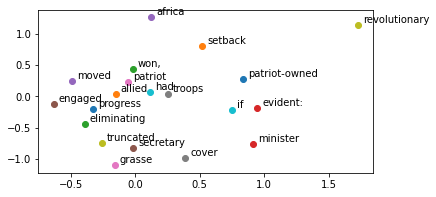

In [397]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocabs[:20]): #loop each unique vocab
    x, y = get_embed_neg_sampling(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.show()

In [398]:
neg_allied = get_embed_neg_sampling('allied')
neg_troops = get_embed_neg_sampling('troops')
neg_engaged = get_embed_neg_sampling('engaged')

neg_allied_troops = cosine_similarity(neg_allied, neg_troops)
neg_allied_engaged = cosine_similarity(neg_allied, neg_engaged)
neg_allied_allied = cosine_similarity(neg_allied, neg_allied)

print(f"allied vs troops {neg_allied_troops}")
print(f"allied vs engaged {neg_allied_engaged}")
print(f"allied vs allied {neg_allied_allied}" )

allied vs troops -0.911798505925149
allied vs engaged 0.9010357462418842
allied vs allied 1.0


### Negative Sampling Skipgram vs Normal Skipgram

In [399]:
print(f'Skipgram with Window size = 2')
print(f"allied vs. allied: ",        skipgram_allied_allied)
print(f"allied vs. engaged: ",       skipgram_allied_engaged)
print(f"allied vs. troops: ",     skipgram_allied_troops)

print(f'Skipgram with negative sampling Window size =  2')
print(f"allied vs. allied: ", neg_allied_allied)
print(f"allied vs. engaged: ", neg_allied_engaged)
print(f"allied vs. troops: ", neg_allied_troops)


Skipgram with Window size = 2
allied vs. allied:  1.0
allied vs. engaged:  -0.1438590368655992
allied vs. troops:  0.999682213662394
Skipgram with negative sampling Window size =  2
allied vs. allied:  1.0
allied vs. engaged:  0.9010357462418842
allied vs. troops:  -0.911798505925149
